In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
import os


### Loading the Dataset

In [ ]:
wines = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/PCD/Datasets/winemag_data_first150k.csv')

#### First 10 values

In [ ]:
wines.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


#### Shape of the dataset

In [ ]:
wines.shape

(150930, 11)

#### Print the name of columns

In [ ]:
wines.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

#### Check for NULL Values

In [ ]:
wines.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### Check unique values

In [ ]:
wines.nunique()

Unnamed: 0     150930
country            48
description     97821
designation     30621
points             21
price             357
province          455
region_1         1236
region_2           18
variety           632
winery          14810
dtype: int64

#### Check for Duplicate values

In [ ]:
wines.duplicated().sum()

0

No duplicate values present.

#### Make a copy of the dataset

In [ ]:
df = wines.copy()

In [ ]:
df.shape

(150930, 11)

#### Drop NULL values

In [ ]:
df = df.dropna()
df.shape

(39241, 11)

#### Print first 10 values

In [ ]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall


# Data Visualization

### Type: Countries

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Country')

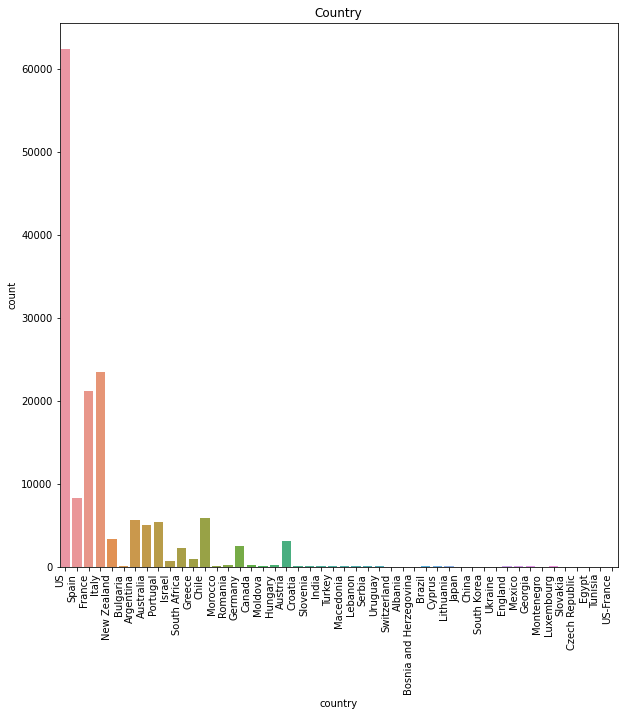

In [ ]:
sns.countplot(wines['country'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Region')

### Points of Wines

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Rating')

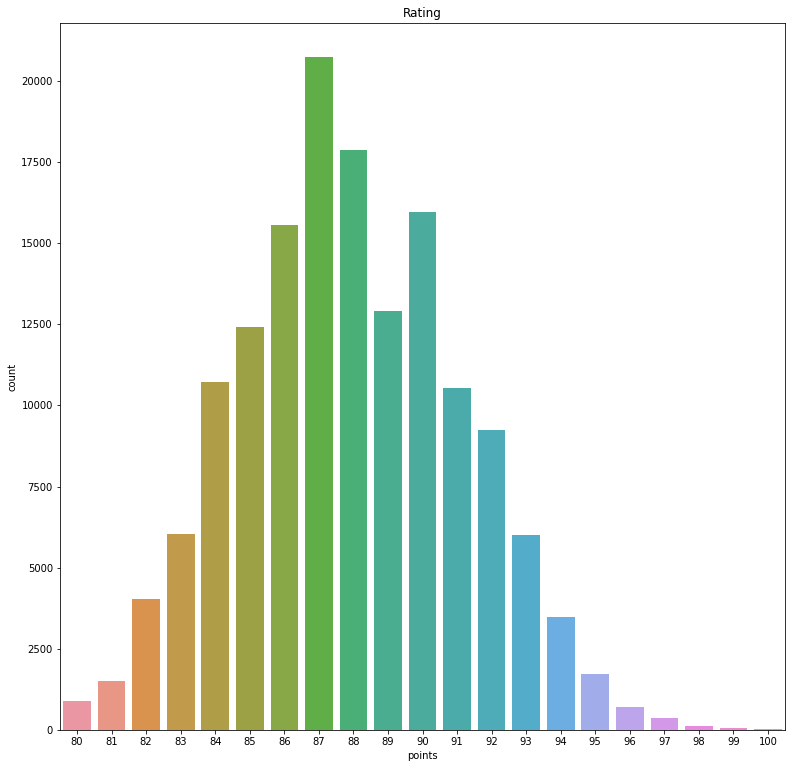

In [ ]:
sns.countplot(wines['points'])
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

### Relation between Type and Rating

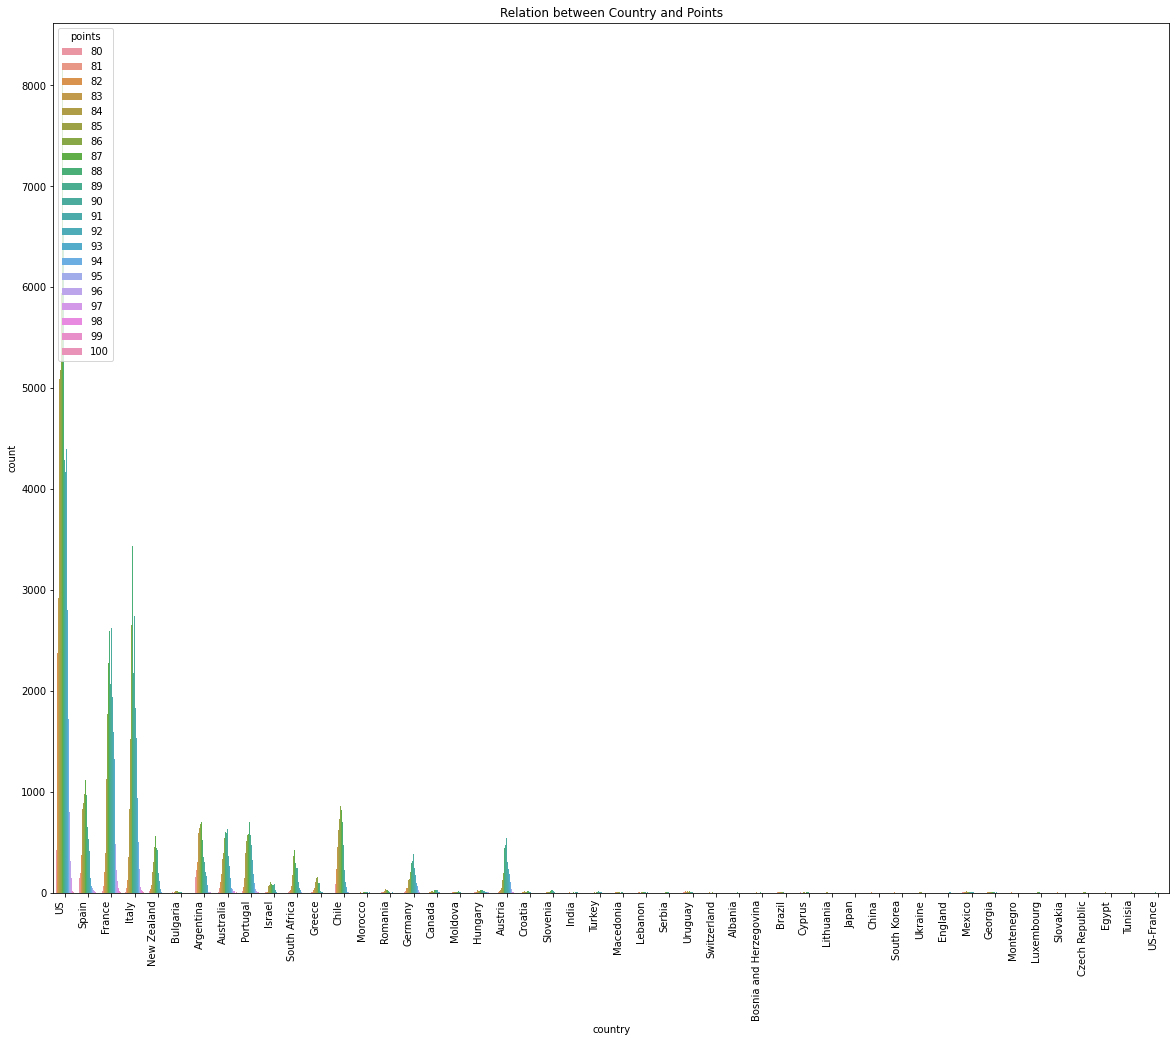

In [ ]:
plt.figure(figsize=(20,16))
sns.countplot(x = 'country',hue = 'points',data = wines)
plt.title('Relation between Country and Points')
plt.xticks(rotation = 90, ha = 'right')
plt.show()

### Pie-chart for the Type: Movie and TV Shows

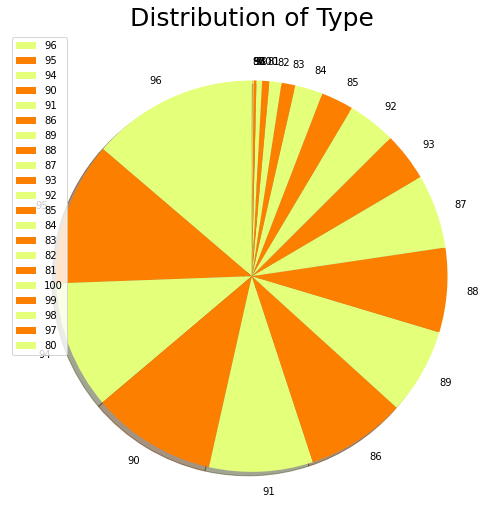

In [ ]:
labels = wines.points.unique().tolist()
size = wines['points'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, labels = labels, colors = colors, 
        shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

### Pie-chart for Rating

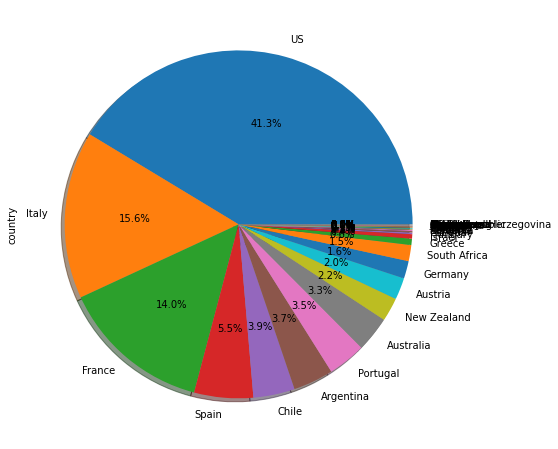

In [ ]:
wines['country'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

# WordCloud

In [ ]:
from wordcloud import WordCloud

## Variety of Wines

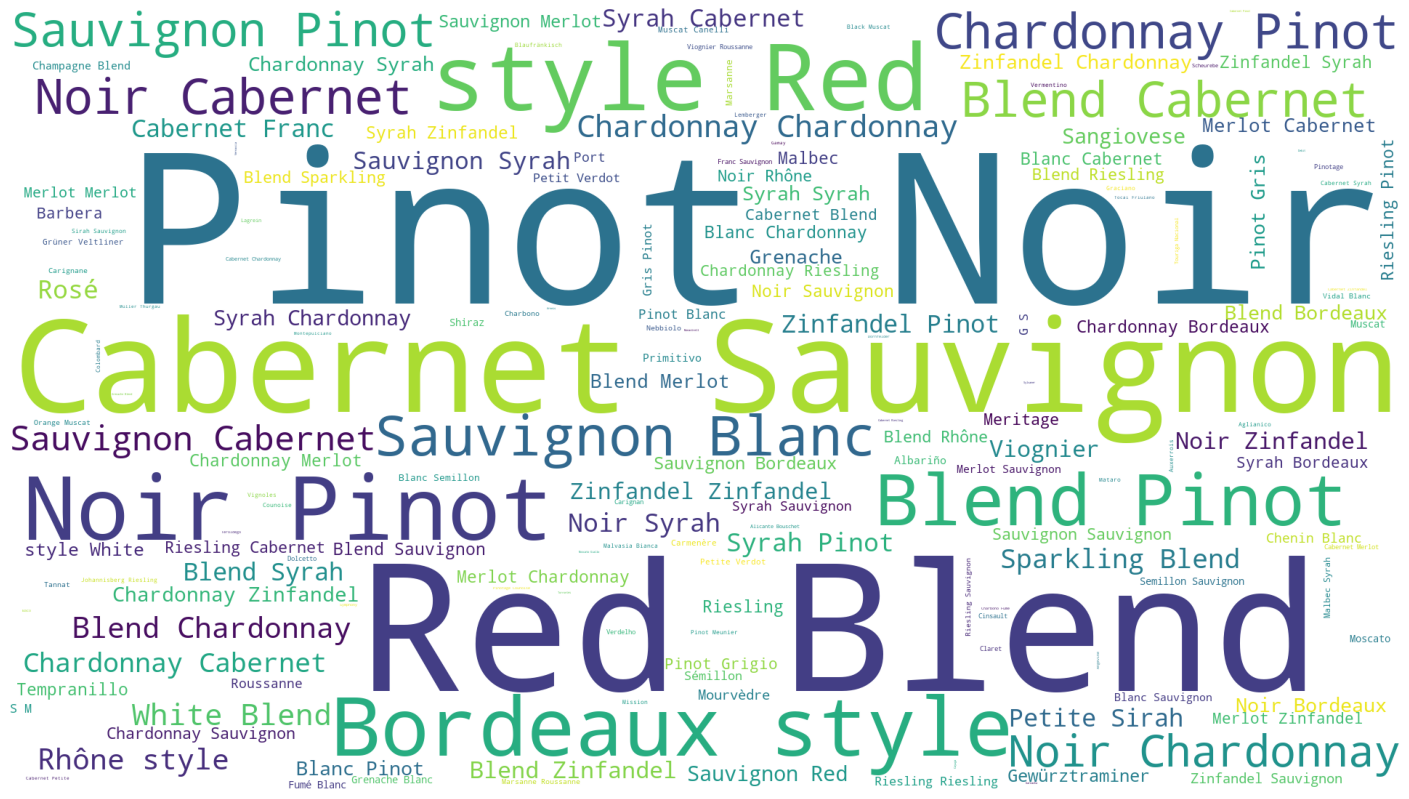

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.variety))
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('country.png')
plt.show()

## Regions

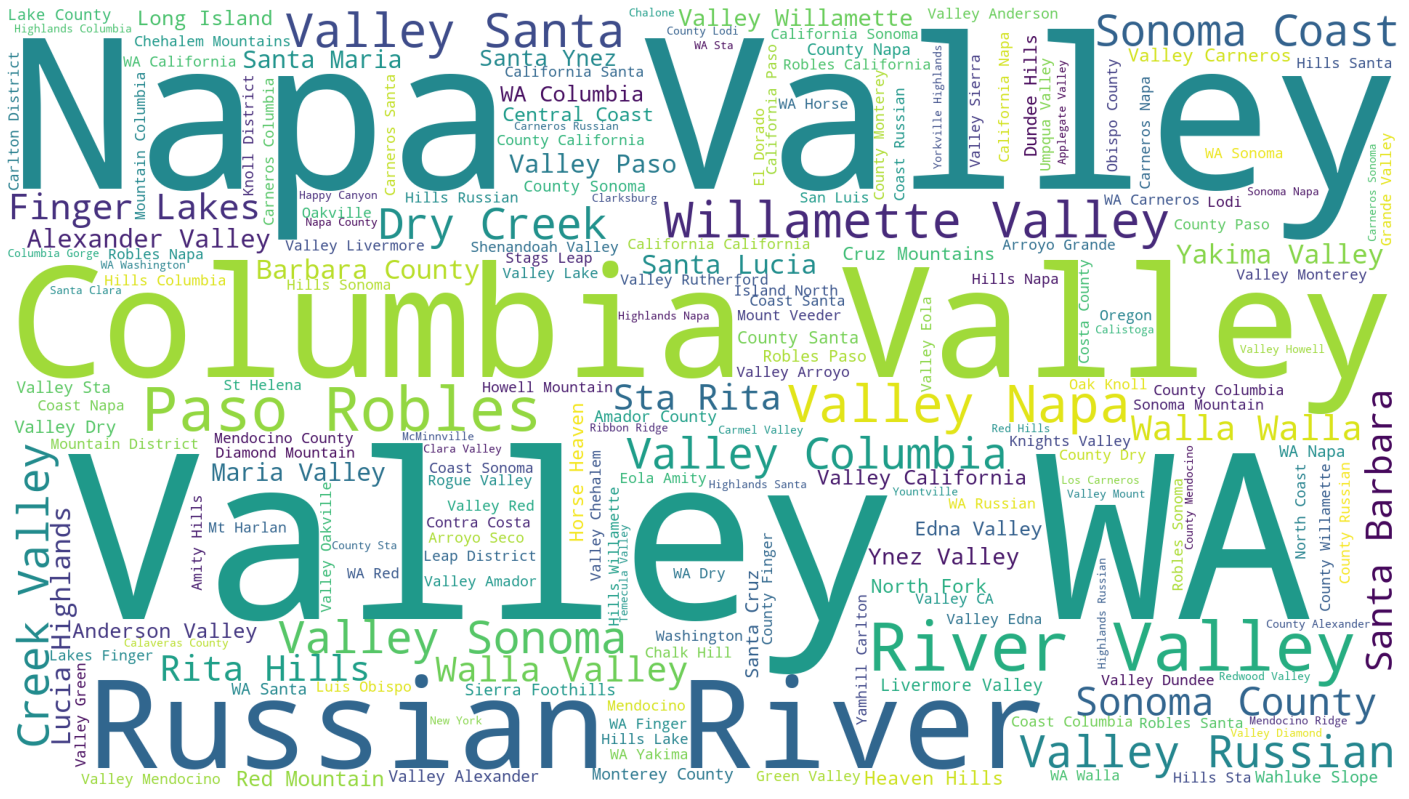

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.region_1))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# Conclusiones

- Existen nulos en las regiones y precios pero no seben ser exlcuidos
- Las calificaciones están muy compactadas entre 80 y 100
- La mayoría de los vinos son de un solo país
- Para mejor entendimiento de las variedades tal vez sea bueno unificar a una categoría más grande para esos vinos (Sauvignon, Noir, etc.)
- Se deben retrabajar las variedades Pinot Noir y Noir Pinot aparecen o en todo caso investigar sí son diferentes variedades.